# 1.0 Exploratory Data Analysis - Vaccination & Registration

### Questions

**1.1 Data Preprocessing**

*1. Any outliers and missing values?*   <br />
*2. If yes,How to you handle those outliers and missing values?*   <br />
*3. Any redundant value?*   <br />
*4. Any unsuitable data type?*   <br />
*5. Any missing date?*   <br />
*6. Any illogical values?*   <br />


**1.2 Data Analysis**

*1. How many people fully vacinnated?*   <br />
*2. What is the trends in the number of fully vacinnated?*   <br />
*3. Ratio in each type of vaccine (popular)*   <br />
*4. Types and total number of side effects  of each type of vaccine*   <br />
*5. Vaccination rate per state (?)*   <br />


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import plotly.express as px
%matplotlib inline

from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
# Loading vaccination datasets

## Adverse Events Following Immunization (AEFI)
aefi = pd.read_csv('dataset/vaccination/aefi.csv')
aefi_serious = pd.read_csv('dataset/vaccination/aefi_serious.csv')

## Vaccination
vax_malaysia = pd.read_csv('dataset/vaccination/vax_malaysia.csv')
vax_state = pd.read_csv('dataset/vaccination/vax_state.csv')

# Loading registration datasets

vaxreg_malaysia = pd.read_csv('dataset/registration/vaxreg_malaysia.csv')
vaxreg_state = pd.read_csv('dataset/registration/vaxreg_state.csv')

## 1.1 Data Preprocessing

### 1.1.1 aefi dataset

In [3]:
aefi.head()

date vaxtype  daily_total  daily_nonserious_mysj  \
0  2021-02-25  pfizer            1                      0   
1  2021-02-26  pfizer            2                      0   
2  2021-02-27  pfizer            4                      0   
3  2021-02-28  pfizer           12                      0   
4  2021-03-01  pfizer           33                      0   

   daily_nonserious_npra  daily_serious_npra  daily_nonserious_mysj_dose1  \
0                      1                   0                            0   
1                      2                   0                            0   
2                      4                   0                            0   
3                     11                   1                            0   
4                     29                   4                            0   

   daily_nonserious_mysj_dose2  d1_site_pain  d1_site_swelling  ...  \
0                            0             0                 0  ...   
1                            0             0                 0  ...   
2                            0             0                 0  ...   
3                            0             0                 0  ...   
4                            0             0                 0  ...   

   d2_site_redness  d2_tiredness  d2_headache  d2_muscle_pain  d2_joint_pain  \
0                0             0            0               0              0   
1                0             0            0               0              0   
2                0             0            0               0              0   
3                0             0            0               0              0   
4                0             0            0               0              0   

   d2_weakness  d2_fever  d2_vomiting  d2_chills  d2_rash  
0            0         0            0          0        0  
1            0         0            0          0        0  
2            0         0            0          0        0  
3            0         0            0          0        0  
4            0         0            0          0        0  

[5 rows x 32 columns]

In [4]:
aefi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   date                         582 non-null    object
 1   vaxtype                      582 non-null    object
 2   daily_total                  582 non-null    int64 
 3   daily_nonserious_mysj        582 non-null    int64 
 4   daily_nonserious_npra        582 non-null    int64 
 5   daily_serious_npra           582 non-null    int64 
 6   daily_nonserious_mysj_dose1  582 non-null    int64 
 7   daily_nonserious_mysj_dose2  582 non-null    int64 
 8   d1_site_pain                 582 non-null    int64 
 9   d1_site_swelling             582 non-null    int64 
 10  d1_site_redness              582 non-null    int64 
 11  d1_tiredness                 582 non-null    int64 
 12  d1_headache                  582 non-null    int64 
 13  d1_muscle_pain               582 no

**1.Any outliers and missing values?**

In [5]:
aefi.isnull().sum()

date                           0
vaxtype                        0
daily_total                    0
daily_nonserious_mysj          0
daily_nonserious_npra          0
daily_serious_npra             0
daily_nonserious_mysj_dose1    0
daily_nonserious_mysj_dose2    0
d1_site_pain                   0
d1_site_swelling               0
d1_site_redness                0
d1_tiredness                   0
d1_headache                    0
d1_muscle_pain                 0
d1_joint_pain                  0
d1_weakness                    0
d1_fever                       0
d1_vomiting                    0
d1_chills                      0
d1_rash                        0
d2_site_pain                   0
d2_site_swelling               0
d2_site_redness                0
d2_tiredness                   0
d2_headache                    0
d2_muscle_pain                 0
d2_joint_pain                  0
d2_weakness                    0
d2_fever                       0
d2_vomiting                    0
d2_chills 

<ipython-input-6-12831c6f3730>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-6-12831c6f3730>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-6-12831c6f3730>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-6-12831c6f3730>:4: RuntimeWarni

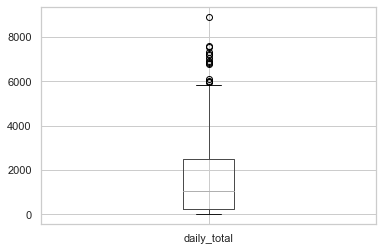

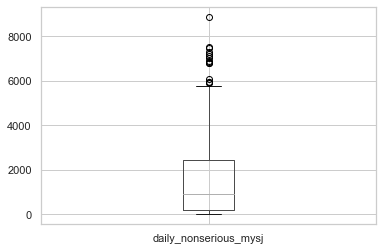

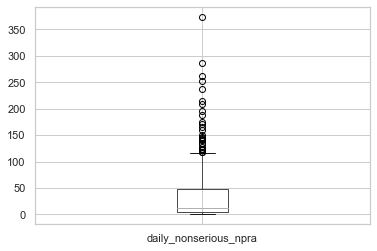

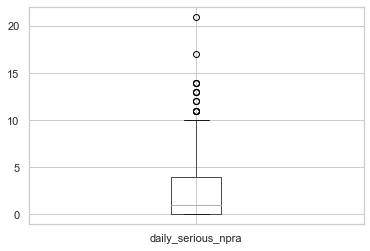

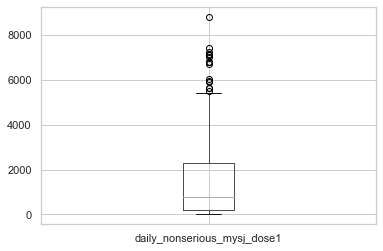

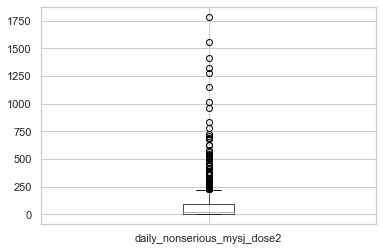

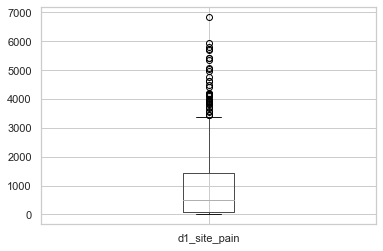

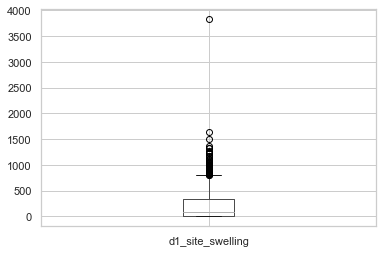

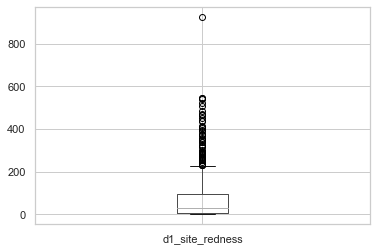

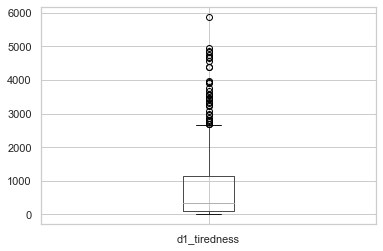

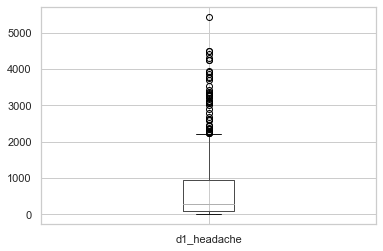

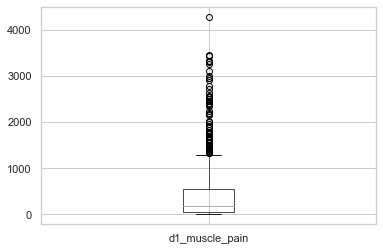

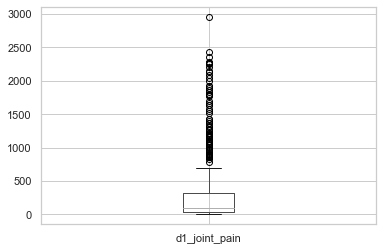

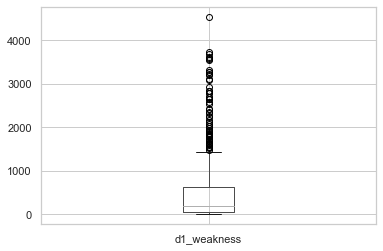

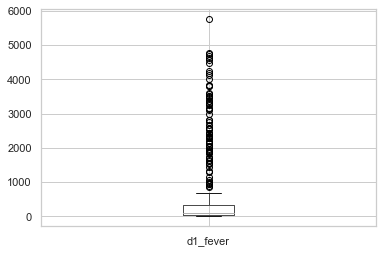

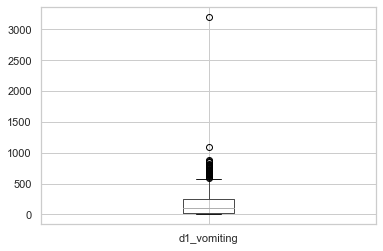

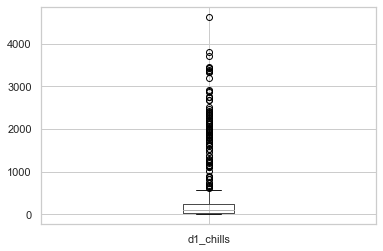

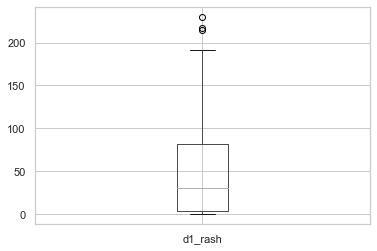

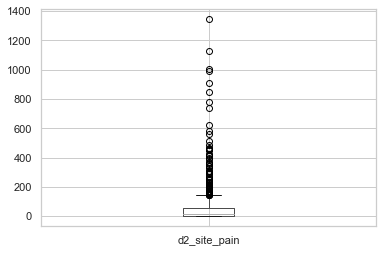

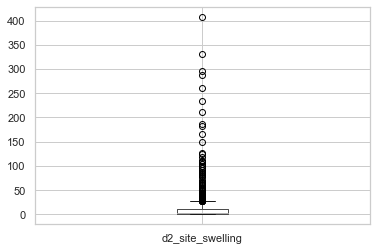

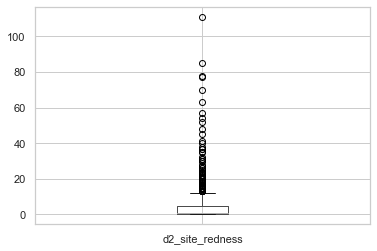

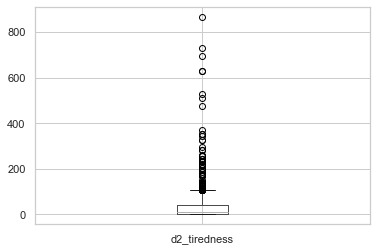

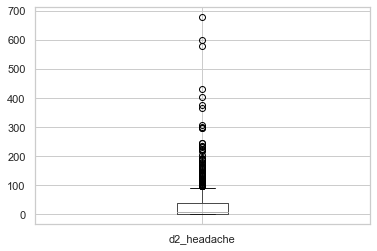

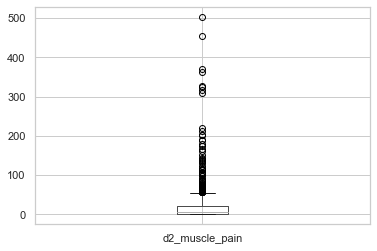

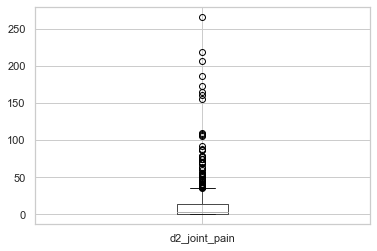

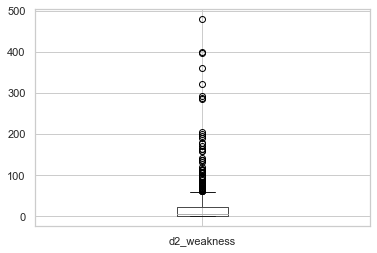

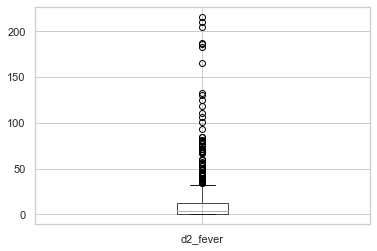

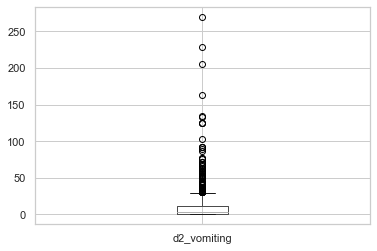

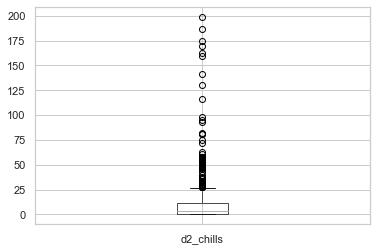

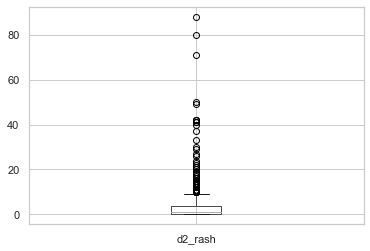

In [6]:
column = aefi.drop(['date','vaxtype'],axis=1).columns

for i in column:
    plt.figure()
    aefi.boxplot([i])

**2. How to handle outlers?**


I dont care

**3. Any redundant value?**

In [7]:
duplicate = aefi[aefi.duplicated()]
duplicate

Empty DataFrame
Columns: [date, vaxtype, daily_total, daily_nonserious_mysj, daily_nonserious_npra, daily_serious_npra, daily_nonserious_mysj_dose1, daily_nonserious_mysj_dose2, d1_site_pain, d1_site_swelling, d1_site_redness, d1_tiredness, d1_headache, d1_muscle_pain, d1_joint_pain, d1_weakness, d1_fever, d1_vomiting, d1_chills, d1_rash, d2_site_pain, d2_site_swelling, d2_site_redness, d2_tiredness, d2_headache, d2_muscle_pain, d2_joint_pain, d2_weakness, d2_fever, d2_vomiting, d2_chills, d2_rash]
Index: []

[0 rows x 32 columns]

**4. Any unsuitable data type?**

In [8]:
aefi['date'] = aefi['date'].astype('datetime64[ns]')

In [9]:
print(aefi['date'].min())
print(aefi['date'].max())

2021-02-25 00:00:00
2021-09-29 00:00:00


**5. Any missing date**

In [10]:
pd.date_range(start = '2021-02-25', end = '2021-09-29' ).difference(aefi.date)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

No missing date

**6. Any illogical values?**

In [11]:
(aefi.drop(['date','vaxtype'],axis=1) < 0).sum()

daily_total                    0
daily_nonserious_mysj          0
daily_nonserious_npra          0
daily_serious_npra             0
daily_nonserious_mysj_dose1    0
daily_nonserious_mysj_dose2    0
d1_site_pain                   0
d1_site_swelling               0
d1_site_redness                0
d1_tiredness                   0
d1_headache                    0
d1_muscle_pain                 0
d1_joint_pain                  0
d1_weakness                    0
d1_fever                       0
d1_vomiting                    0
d1_chills                      0
d1_rash                        0
d2_site_pain                   0
d2_site_swelling               0
d2_site_redness                0
d2_tiredness                   0
d2_headache                    0
d2_muscle_pain                 0
d2_joint_pain                  0
d2_weakness                    0
d2_fever                       0
d2_vomiting                    0
d2_chills                      0
d2_rash                        0
dtype: int

### 1.1.1 aefi_serious dataset

In [12]:
aefi_serious.head()

date      vaxtype  suspected_anaphylaxis  acute_facial_paralysis  \
0  2021-08-23       pfizer                     30                      27   
1  2021-08-23      sinovac                      7                      16   
2  2021-08-23  astrazeneca                      0                       1   
3  2021-08-23      cansino                      0                       0   
4  2021-09-05       pfizer                     31                      37   

   venous_thromboembolism  myo_pericarditis  
0                      10                 0  
1                       6                 0  
2                       2                 0  
3                       0                 0  
4                      15                 2

In [13]:
aefi_serious.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    12 non-null     object
 1   vaxtype                 12 non-null     object
 2   suspected_anaphylaxis   12 non-null     int64 
 3   acute_facial_paralysis  12 non-null     int64 
 4   venous_thromboembolism  12 non-null     int64 
 5   myo_pericarditis        12 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 704.0+ bytes


**1. Any outliers and missing values?**

In [14]:
aefi_serious.isnull().sum()

date                      0
vaxtype                   0
suspected_anaphylaxis     0
acute_facial_paralysis    0
venous_thromboembolism    0
myo_pericarditis          0
dtype: int64

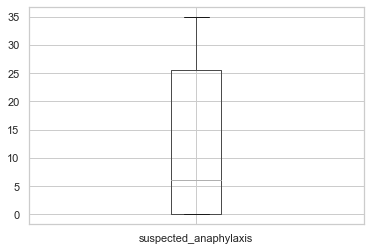

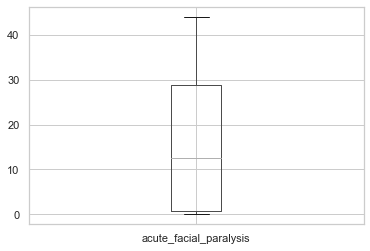

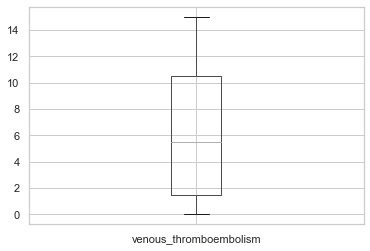

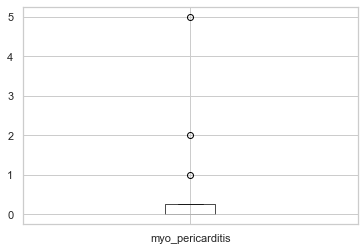

In [15]:
column = aefi_serious.drop(['date','vaxtype'],axis=1).columns

for i in column:
    plt.figure()
    aefi_serious.boxplot([i])

**2. How to handle outlers?**


I dont care

**3. Any redundant value?**

In [16]:
duplicate = aefi_serious[aefi_serious.duplicated()]
duplicate

Empty DataFrame
Columns: [date, vaxtype, suspected_anaphylaxis, acute_facial_paralysis, venous_thromboembolism, myo_pericarditis]
Index: []

**4. Any unsuitable data type?**

In [17]:
aefi_serious['date'] = aefi_serious['date'].astype('datetime64[ns]')

**5. Any missing date**

In [18]:
(aefi_serious.drop(['date','vaxtype'],axis=1) < 0).sum()

suspected_anaphylaxis     0
acute_facial_paralysis    0
venous_thromboembolism    0
myo_pericarditis          0
dtype: int64

**6. Any illogical values?**

In [19]:
(aefi_serious.drop(['date','vaxtype'],axis=1) < 0).sum()

suspected_anaphylaxis     0
acute_facial_paralysis    0
venous_thromboembolism    0
myo_pericarditis          0
dtype: int64

## vax_malaysia dataset

In [20]:
vax_malaysia.head()

date  daily_partial  daily_full  daily  daily_partial_child  \
0  2021-02-24             60           0     60                    0   
1  2021-02-25           1146           0   1146                    0   
2  2021-02-26           4115           1   4116                    0   
3  2021-02-27           6723           1   6724                    0   
4  2021-02-28           6699           3   6702                    0   

   daily_full_child  cumul_partial  cumul_full  cumul  cumul_partial_child  \
0                 0             60           0     60                    0   
1                 0           1206           0   1206                    0   
2                 0           5321           1   5322                    0   
3                 0          12044           2  12046                    0   
4                 0          18743           5  18748                    0   

   cumul_full_child  pfizer1  pfizer2  sinovac1  sinovac2  astra1  astra2  \
0                 0       60        0         0         0       0       0   
1                 0     1146        0         0         0       0       0   
2                 0     4115        1         0         0       0       0   
3                 0     6723        1         0         0       0       0   
4                 0     6699        3         0         0       0       0   

   cansino  pending  
0        0        0  
1        0        0  
2        0        0  
3        0        0  
4        0        0

**1.Any outliers and missing values?**

In [21]:
vax_malaysia.isnull().sum()

date                   0
daily_partial          0
daily_full             0
daily                  0
daily_partial_child    0
daily_full_child       0
cumul_partial          0
cumul_full             0
cumul                  0
cumul_partial_child    0
cumul_full_child       0
pfizer1                0
pfizer2                0
sinovac1               0
sinovac2               0
astra1                 0
astra2                 0
cansino                0
pending                0
dtype: int64

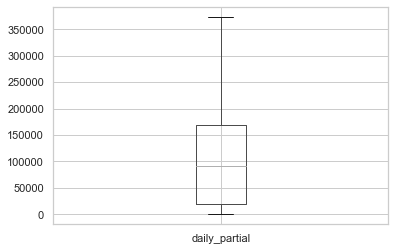

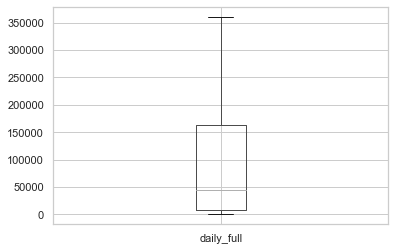

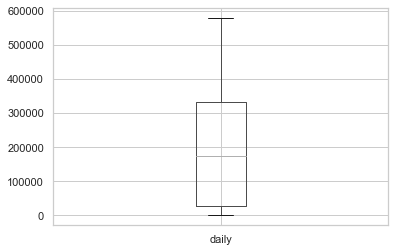

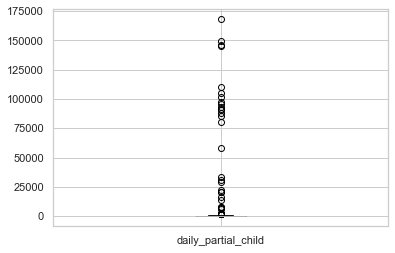

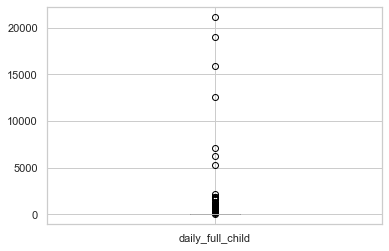

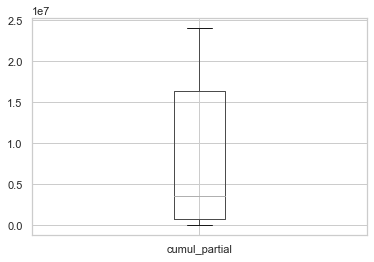

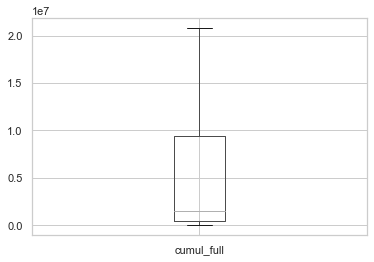

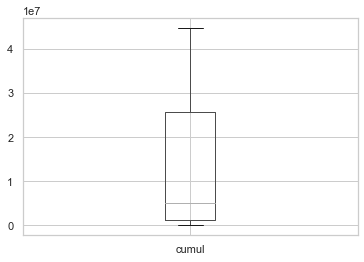

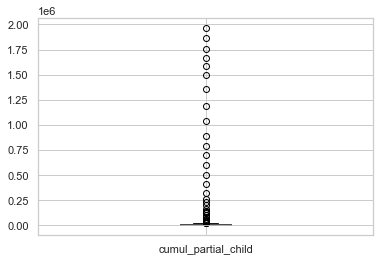

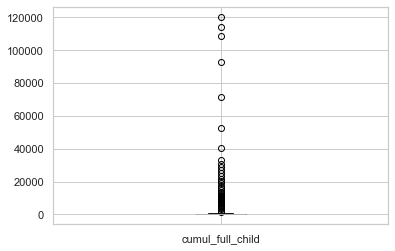

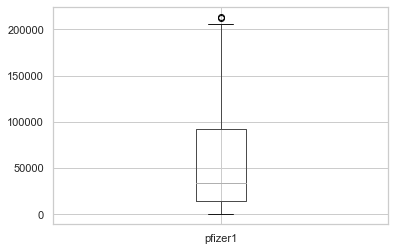

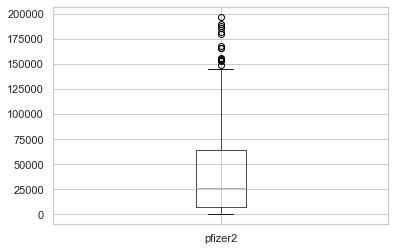

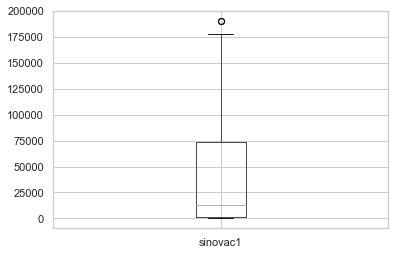

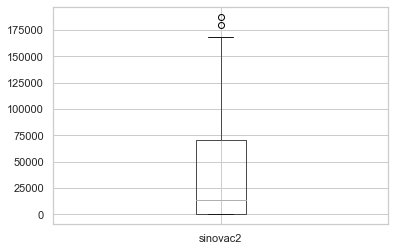

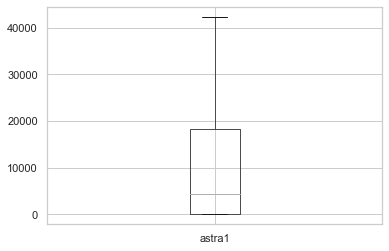

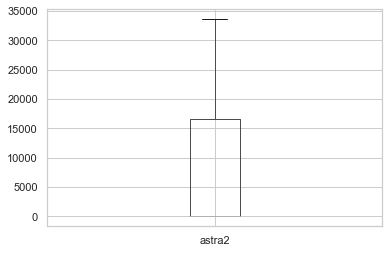

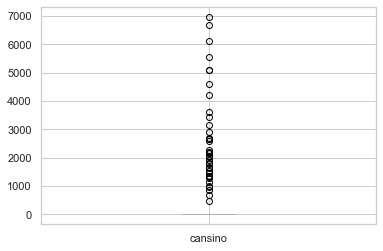

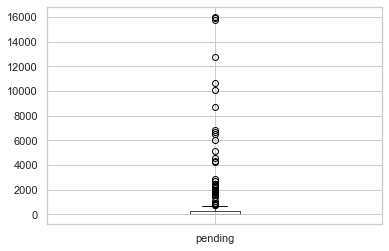

In [22]:
column = vax_malaysia.drop(['date'],axis=1).columns

for i in column:
    plt.figure()
    vax_malaysia.boxplot([i])

**2. How to handle outlers?**


I dont care

**3. Any redundant value?**

In [23]:
duplicate = vax_malaysia[vax_malaysia.duplicated()]
duplicate

Empty DataFrame
Columns: [date, daily_partial, daily_full, daily, daily_partial_child, daily_full_child, cumul_partial, cumul_full, cumul, cumul_partial_child, cumul_full_child, pfizer1, pfizer2, sinovac1, sinovac2, astra1, astra2, cansino, pending]
Index: []

**4. Any unsuitable data type?**

In [24]:
vax_malaysia['date'] = vax_malaysia['date'].astype('datetime64[ns]')

In [25]:
print(vax_malaysia['date'].min())
print(vax_malaysia['date'].max())

2021-02-24 00:00:00
2021-10-05 00:00:00


**5. Any missing date**

In [26]:
pd.date_range(start = '2021-02-24', end = '2021-10-05').difference(vax_malaysia.date)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

**6. Any illogical values?**

In [27]:
(vax_malaysia.drop(['date'],axis=1) < 0).sum()

daily_partial          0
daily_full             0
daily                  0
daily_partial_child    0
daily_full_child       0
cumul_partial          0
cumul_full             0
cumul                  0
cumul_partial_child    0
cumul_full_child       0
pfizer1                0
pfizer2                0
sinovac1               0
sinovac2               0
astra1                 0
astra2                 0
cansino                0
pending                0
dtype: int64

## vax_state dataset

In [28]:
vax_state.head()

date            state  daily_partial  daily_full  daily  \
0  2021-02-24            Johor              0           0      0   
1  2021-02-24            Kedah              0           0      0   
2  2021-02-24         Kelantan              0           0      0   
3  2021-02-24           Melaka              0           0      0   
4  2021-02-24  Negeri Sembilan              0           0      0   

   daily_partial_child  daily_full_child  cumul_partial  cumul_full  cumul  \
0                    0                 0              0           0      0   
1                    0                 0              0           0      0   
2                    0                 0              0           0      0   
3                    0                 0              0           0      0   
4                    0                 0              0           0      0   

   cumul_partial_child  cumul_full_child  pfizer1  pfizer2  sinovac1  \
0                    0                 0        0        0         0   
1                    0                 0        0        0         0   
2                    0                 0        0        0         0   
3                    0                 0        0        0         0   
4                    0                 0        0        0         0   

   sinovac2  astra1  astra2  cansino  pending  
0         0       0       0        0        0  
1         0       0       0        0        0  
2         0       0       0        0        0  
3         0       0       0        0        0  
4         0       0       0        0        0

**1.Any outliers and missing values?**

In [29]:
vax_state.isnull().sum()

date                   0
state                  0
daily_partial          0
daily_full             0
daily                  0
daily_partial_child    0
daily_full_child       0
cumul_partial          0
cumul_full             0
cumul                  0
cumul_partial_child    0
cumul_full_child       0
pfizer1                0
pfizer2                0
sinovac1               0
sinovac2               0
astra1                 0
astra2                 0
cansino                0
pending                0
dtype: int64

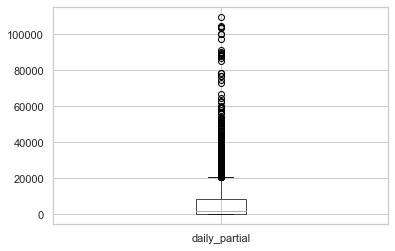

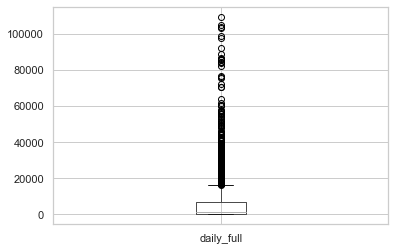

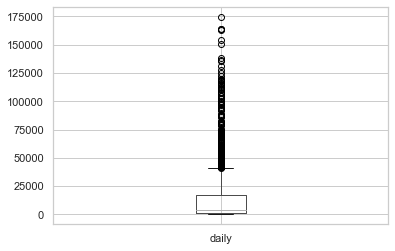

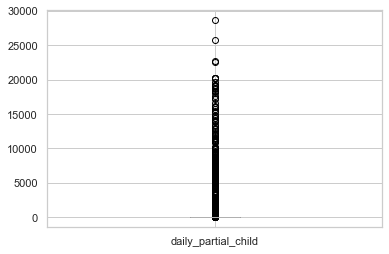

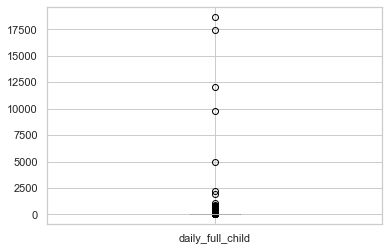

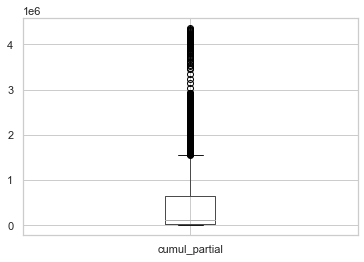

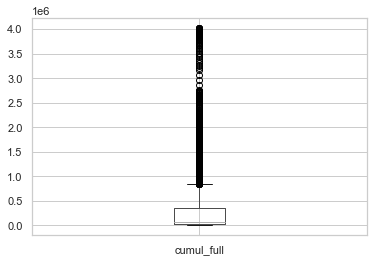

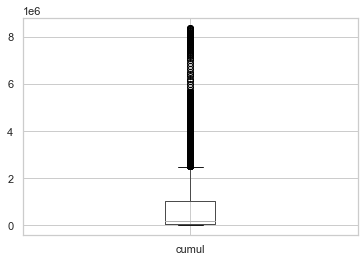

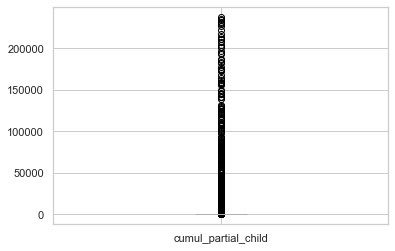

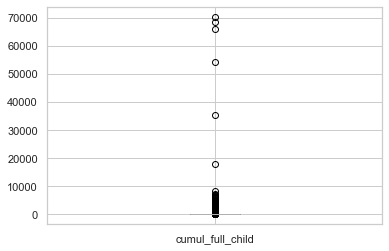

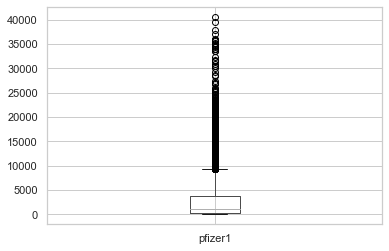

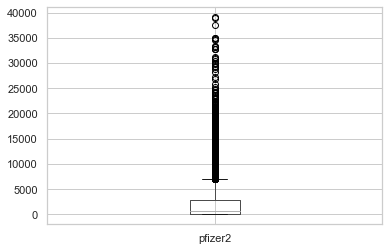

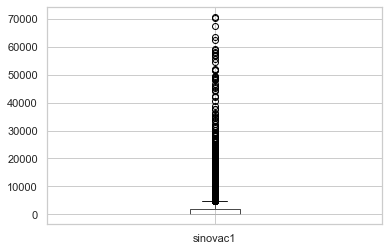

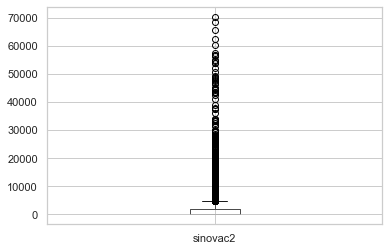

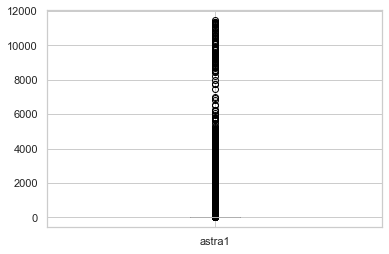

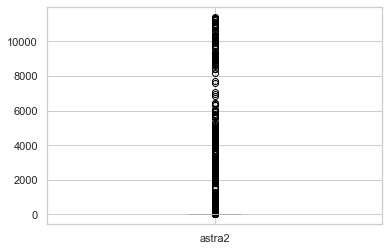

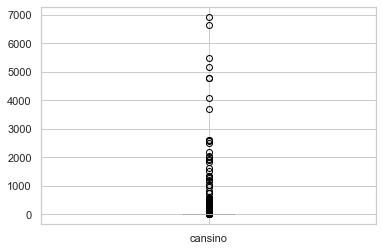

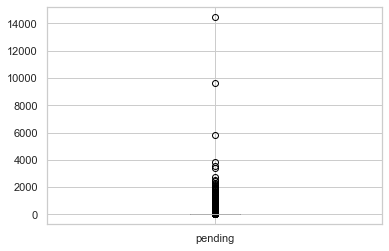

In [30]:
column = vax_state.drop(['date','state'],axis=1).columns

for i in column:
    plt.figure()
    vax_state.boxplot([i])

**2. How to handle outlers?**


I dont care

**3. Any redundant value?**

In [31]:
duplicate = vax_state[vax_state.duplicated()]
duplicate

Empty DataFrame
Columns: [date, state, daily_partial, daily_full, daily, daily_partial_child, daily_full_child, cumul_partial, cumul_full, cumul, cumul_partial_child, cumul_full_child, pfizer1, pfizer2, sinovac1, sinovac2, astra1, astra2, cansino, pending]
Index: []

**4. Any unsuitable data type?**

In [32]:
vax_state['date'] = vax_state['date'].astype('datetime64[ns]')

In [33]:
print(vax_state['date'].min())
print(vax_state['date'].max())

2021-02-24 00:00:00
2021-10-05 00:00:00


**5. Any missing date**

In [34]:
pd.date_range(start = '2021-02-24', end = '2021-10-05').difference(vax_state.date)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

**6. Any illogical values?**

In [35]:
(vax_state.drop(['date','state'],axis=1) < 0).sum()

daily_partial          0
daily_full             0
daily                  0
daily_partial_child    0
daily_full_child       0
cumul_partial          0
cumul_full             0
cumul                  0
cumul_partial_child    0
cumul_full_child       0
pfizer1                0
pfizer2                0
sinovac1               0
sinovac2               0
astra1                 0
astra2                 0
cansino                0
pending                0
dtype: int64

## vaxreg_malaysia dataset

In [36]:
vaxreg_malaysia.head()

date     state     total   phase2      mysj   call      web  \
0  2021-06-24  Malaysia  16191488  5219793  14910368  10668  1270452   
1  2021-06-25  Malaysia  16321185  5253580  15031571  10779  1278835   
2  2021-06-26  Malaysia  16431724  5282795  15136062  10892  1284770   
3  2021-06-27  Malaysia  16515196  5304420  15231554  10808  1272834   
4  2021-06-28  Malaysia  16630764  5333905  15335726  10933  1284105   

   children  elderly   comorb     oku  
0    776980  2787690  3938517  298917  
1    797921  2802744  3964444  301849  
2    815984  2815665  3986607  304571  
3    830643  2824735  4003420  306740  
4    842985  2835474  4027560  309623

In [37]:
vaxreg_malaysia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      104 non-null    object
 1   state     104 non-null    object
 2   total     104 non-null    int64 
 3   phase2    104 non-null    int64 
 4   mysj      104 non-null    int64 
 5   call      104 non-null    int64 
 6   web       104 non-null    int64 
 7   children  104 non-null    int64 
 8   elderly   104 non-null    int64 
 9   comorb    104 non-null    int64 
 10  oku       104 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 9.1+ KB


**1.Any outliers and missing values?**

In [38]:
vaxreg_malaysia.isnull().sum()

date        0
state       0
total       0
phase2      0
mysj        0
call        0
web         0
children    0
elderly     0
comorb      0
oku         0
dtype: int64

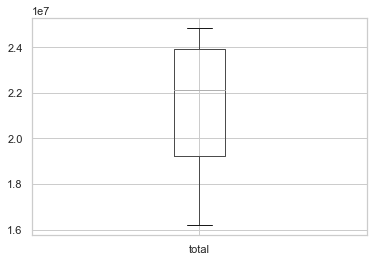

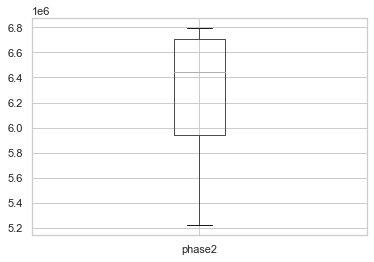

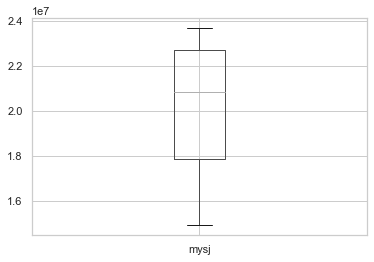

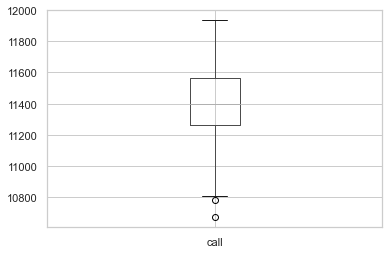

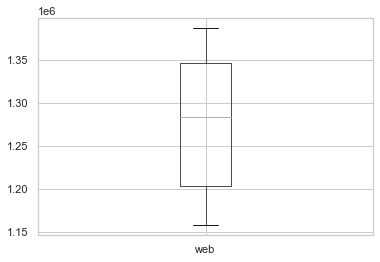

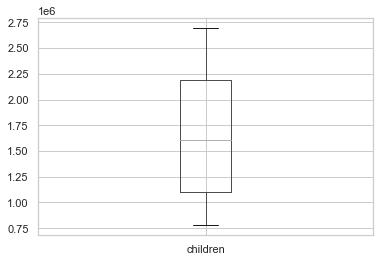

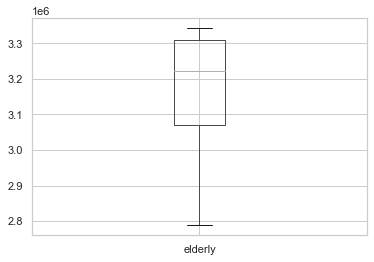

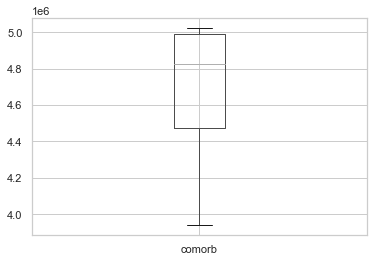

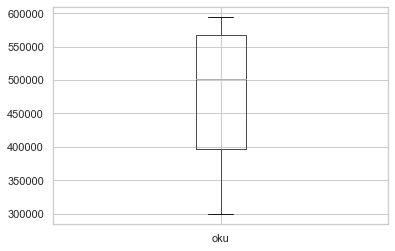

In [39]:
column = vaxreg_malaysia.drop(['date','state'],axis=1).columns

for i in column:
    plt.figure()
    vaxreg_malaysia.boxplot([i])

**2. How to handle outlers?**


I dont care

**3. Any redundant value?**

In [40]:
duplicate = vaxreg_malaysia[vaxreg_malaysia.duplicated()]
duplicate

Empty DataFrame
Columns: [date, state, total, phase2, mysj, call, web, children, elderly, comorb, oku]
Index: []

**4. Any unsuitable data type?**

In [41]:
vaxreg_malaysia['date'] = vaxreg_malaysia['date'].astype('datetime64[ns]')

In [42]:
print(vaxreg_malaysia['date'].min())
print(vaxreg_malaysia['date'].max())

2021-06-24 00:00:00
2021-10-05 00:00:00


**5. Any missing date**

In [43]:
pd.date_range(start = '2021-06-24', end = '2021-10-05').difference(vaxreg_malaysia.date)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

**6. Any illogical values?**

In [44]:
(vaxreg_malaysia.drop(['date','state'],axis=1) < 0).sum()

total       0
phase2      0
mysj        0
call        0
web         0
children    0
elderly     0
comorb      0
oku         0
dtype: int64

##  vaxreg_state dataset

In [45]:
vaxreg_state.head()

date            state    total  phase2     mysj  call     web  \
0  2021-06-24            Johor  2024149  657731  1880609  1167  142373   
1  2021-06-24            Kedah   938187  340264   850376   855   86956   
2  2021-06-24         Kelantan   621203  223260   527284   426   93493   
3  2021-06-24           Melaka   510641  179964   484164   436   26041   
4  2021-06-24  Negeri Sembilan   633026  229995   591847   592   40587   

   children  elderly  comorb    oku  
0     94096   373226  477510  39807  
1     39636   181729  264154  20150  
2     26305   119608  173570  12921  
3     25638    98045  138618  13547  
4     32396   125029  179280  13902

In [46]:
vaxreg_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664 entries, 0 to 1663
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      1664 non-null   object
 1   state     1664 non-null   object
 2   total     1664 non-null   int64 
 3   phase2    1664 non-null   int64 
 4   mysj      1664 non-null   int64 
 5   call      1664 non-null   int64 
 6   web       1664 non-null   int64 
 7   children  1664 non-null   int64 
 8   elderly   1664 non-null   int64 
 9   comorb    1664 non-null   int64 
 10  oku       1664 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 143.1+ KB


**1.Any outliers and missing values?**

In [47]:
vaxreg_state.isnull().sum()

date        0
state       0
total       0
phase2      0
mysj        0
call        0
web         0
children    0
elderly     0
comorb      0
oku         0
dtype: int64

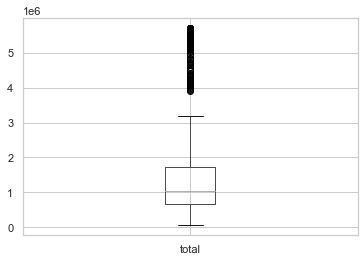

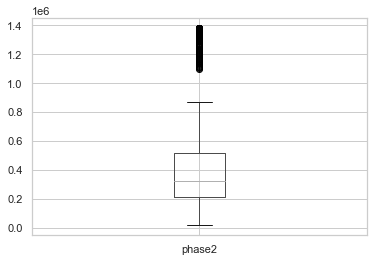

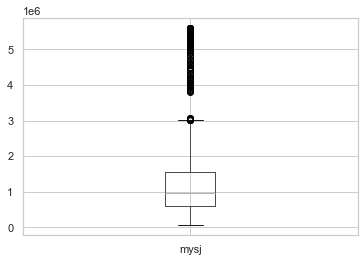

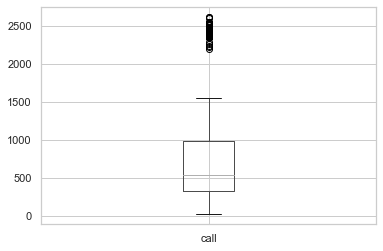

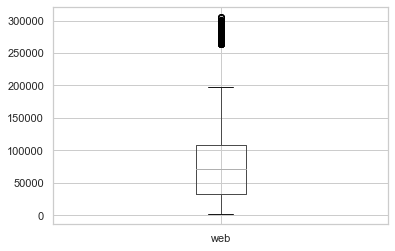

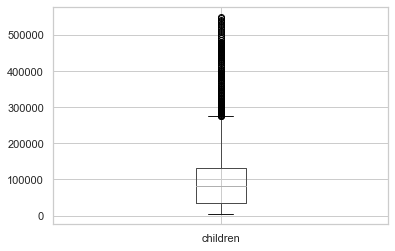

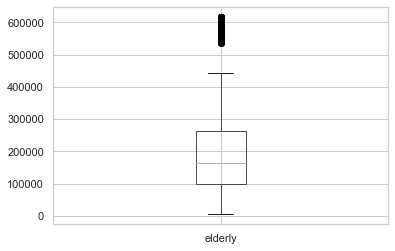

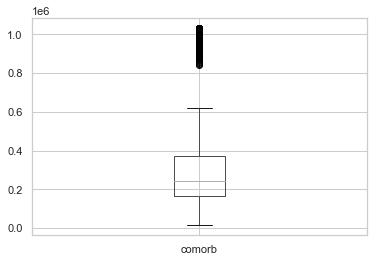

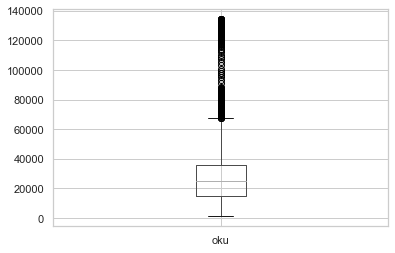

In [48]:
column = vaxreg_state.drop(['date','state'],axis=1).columns

for i in column:
    plt.figure()
    vaxreg_state.boxplot([i])

**2. How to handle outlers?**


I dont care

**3. Any redundant value?**

In [49]:
duplicate = vaxreg_state[vaxreg_state.duplicated()]
duplicate

Empty DataFrame
Columns: [date, state, total, phase2, mysj, call, web, children, elderly, comorb, oku]
Index: []

**4. Any unsuitable data type?**

In [50]:
vaxreg_state['date'] = vaxreg_state['date'].astype('datetime64[ns]')

In [51]:
print(vaxreg_state['date'].min())
print(vaxreg_state['date'].max())

2021-06-24 00:00:00
2021-10-05 00:00:00


**5. Any missing date**

In [52]:
pd.date_range(start = '2021-06-24', end = '2021-10-05').difference(vaxreg_state.date)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

**6. Any illogical values?**

In [53]:
(vaxreg_state.drop(['date','state'],axis=1) < 0).sum()

total       0
phase2      0
mysj        0
call        0
web         0
children    0
elderly     0
comorb      0
oku         0
dtype: int64

In [54]:
import pickle

pickle.dump(aefi, open('pickle_files/aefi.pkl', 'wb'))
pickle.dump(aefi_serious, open('pickle_files/aefi_serious.pkl', 'wb'))
pickle.dump(vax_malaysia, open('pickle_files/vax_malaysia.pkl', 'wb'))
pickle.dump(vax_state, open('pickle_files/vax_state.pkl', 'wb'))
pickle.dump(vaxreg_malaysia, open('pickle_files/vaxreg_malaysia.pkl', 'wb'))
pickle.dump(vaxreg_state, open('pickle_files/vaxreg_state.pkl', 'wb'))

## Data Analysis

**1. How many people fully vacinnated?**

In [55]:
vax_malaysia.head()

date  daily_partial  daily_full  daily  daily_partial_child  \
0 2021-02-24             60           0     60                    0   
1 2021-02-25           1146           0   1146                    0   
2 2021-02-26           4115           1   4116                    0   
3 2021-02-27           6723           1   6724                    0   
4 2021-02-28           6699           3   6702                    0   

   daily_full_child  cumul_partial  cumul_full  cumul  cumul_partial_child  \
0                 0             60           0     60                    0   
1                 0           1206           0   1206                    0   
2                 0           5321           1   5322                    0   
3                 0          12044           2  12046                    0   
4                 0          18743           5  18748                    0   

   cumul_full_child  pfizer1  pfizer2  sinovac1  sinovac2  astra1  astra2  \
0                 0       60        0         0         0       0       0   
1                 0     1146        0         0         0       0       0   
2                 0     4115        1         0         0       0       0   
3                 0     6723        1         0         0       0       0   
4                 0     6699        3         0         0       0       0   

   cansino  pending  
0        0        0  
1        0        0  
2        0        0  
3        0        0  
4        0        0

In [56]:
df = vax_malaysia[['daily_partial','daily_full']]
df = df.sum()
print("Total number of people fully vaccinated: " + str(df['daily_partial']))

Total number of people fully vaccinated: 23978671


In [57]:
fig = px.bar(df,title='Total amount of vaccinat')
fig.show()

**2. What is the trends in the number of fully vacinnated?**

In [58]:
fig1 = px.line(vax_malaysia, x="date", y="daily_full", title='trend of fully vacinnated')
fig2 = px.line(vax_malaysia, x="date", y="daily_partial", title='trend of partial vacinnated')
fig1.show()
fig2.show()

**3. Ratio in each type of vaccine (popular)**

In [59]:
vax_malaysia.head()
df = vax_malaysia[['pfizer1','sinovac1','astra1','cansino']]
df = df.rename(columns={'pfizer1':'pfizer','sinovac1':'sinovac','astra1':'astra'})
df = df.sum()
df = pd.DataFrame(df)
df = df.reset_index()
df = df.rename(columns={'index':'vaxtype',0:'total'})
fig = px.pie(df, values='total', names='vaxtype')
fig.show()

**4. Types and total number of side effects  of each type of vaccine** 

In [60]:
aefi.head()

date vaxtype  daily_total  daily_nonserious_mysj  \
0 2021-02-25  pfizer            1                      0   
1 2021-02-26  pfizer            2                      0   
2 2021-02-27  pfizer            4                      0   
3 2021-02-28  pfizer           12                      0   
4 2021-03-01  pfizer           33                      0   

   daily_nonserious_npra  daily_serious_npra  daily_nonserious_mysj_dose1  \
0                      1                   0                            0   
1                      2                   0                            0   
2                      4                   0                            0   
3                     11                   1                            0   
4                     29                   4                            0   

   daily_nonserious_mysj_dose2  d1_site_pain  d1_site_swelling  ...  \
0                            0             0                 0  ...   
1                            0             0                 0  ...   
2                            0             0                 0  ...   
3                            0             0                 0  ...   
4                            0             0                 0  ...   

   d2_site_redness  d2_tiredness  d2_headache  d2_muscle_pain  d2_joint_pain  \
0                0             0            0               0              0   
1                0             0            0               0              0   
2                0             0            0               0              0   
3                0             0            0               0              0   
4                0             0            0               0              0   

   d2_weakness  d2_fever  d2_vomiting  d2_chills  d2_rash  
0            0         0            0          0        0  
1            0         0            0          0        0  
2            0         0            0          0        0  
3            0         0            0          0        0  
4            0         0            0          0        0  

[5 rows x 32 columns]

In [61]:
df = aefi[['vaxtype','d1_site_pain','d1_site_swelling','d1_site_redness','d1_tiredness','d1_headache','d1_muscle_pain','d1_joint_pain','d1_weakness', 'd1_fever','d1_vomiting','d1_chills','d1_rash']].copy()
df = df.groupby('vaxtype').sum()
df2 = aefi[['vaxtype','d2_site_pain','d2_site_swelling','d2_site_redness','d2_tiredness','d2_headache','d2_muscle_pain','d2_joint_pain','d2_weakness', 'd2_fever','d2_vomiting','d2_chills','d2_rash']].copy()
df2 = df2.groupby('vaxtype').sum()
fig1 = px.bar(df)
fig2 = px.bar(df2)
fig1.show()
fig2.show()

In [62]:
# Serious case

df = aefi_serious.groupby('vaxtype').sum()
fig = px.bar(df)
fig.show()

**5.Vaccination rate per state (?)**

In [63]:
ppl = pd.read_csv('dataset/static/population_moh.csv')
vax_state.head()

date            state  daily_partial  daily_full  daily  \
0 2021-02-24            Johor              0           0      0   
1 2021-02-24            Kedah              0           0      0   
2 2021-02-24         Kelantan              0           0      0   
3 2021-02-24           Melaka              0           0      0   
4 2021-02-24  Negeri Sembilan              0           0      0   

   daily_partial_child  daily_full_child  cumul_partial  cumul_full  cumul  \
0                    0                 0              0           0      0   
1                    0                 0              0           0      0   
2                    0                 0              0           0      0   
3                    0                 0              0           0      0   
4                    0                 0              0           0      0   

   cumul_partial_child  cumul_full_child  pfizer1  pfizer2  sinovac1  \
0                    0                 0        0        0         0   
1                    0                 0        0        0         0   
2                    0                 0        0        0         0   
3                    0                 0        0        0         0   
4                    0                 0        0        0         0   

   sinovac2  astra1  astra2  cansino  pending  
0         0       0       0        0        0  
1         0       0       0        0        0  
2         0       0       0        0        0  
3         0       0       0        0        0  
4         0       0       0        0        0

In [64]:
df = vax_state.groupby('state')['daily_full'].sum()
column = df.keys()

In [65]:
ppl.drop(0,axis=0,inplace=True)

In [66]:
state = []
ratio = []
for i in column:
    ppl_num = ppl[ppl['state']==i]['pop'].sum()
    vax_num = vax_state[vax_state['state']==i]['daily_full'].sum()
    cal = vax_num/ppl_num * 100
    state.append(i)
    ratio.append(cal)
    
    
                               

In [67]:
df = pd.DataFrame(data=ratio,index=state)
df.reset_index(inplace=True)
df.rename(columns={'index':'state',0:'Ratio'},inplace=True)
fig = px.bar(df,x='state',y='Ratio')
fig.show()

In [68]:
print(vax_state[vax_state['state']=='W.P. Kuala Lumpur']['daily_full'].sum())
print(ppl[ppl['state']=='W.P. Kuala Lumpur']['pop'].sum())

2743217
1773700


In [82]:
malaysia_total_human = ppl['pop'].sum()
malaysia_total_reg  = vaxreg_malaysia['total'].max()
total_not_reg = malaysia_total_human - malaysia_total_reg
total_not_reg
d = {'Status': ['Register', 'Not Register'], 'Frequency': [malaysia_total_reg, total_not_reg]}
df = pd.DataFrame(data=d)
fig = px.pie(df, values='Frequency', names='Status')
fig.show()

In [83]:
aefi

date      vaxtype  daily_total  daily_nonserious_mysj  \
0   2021-02-25       pfizer            1                      0   
1   2021-02-26       pfizer            2                      0   
2   2021-02-27       pfizer            4                      0   
3   2021-02-28       pfizer           12                      0   
4   2021-03-01       pfizer           33                      0   
..         ...          ...          ...                    ...   
577 2021-09-28      sinovac          171                    165   
578 2021-09-29  astrazeneca         1321                   1320   
579 2021-09-29       pfizer         2240                   2151   
580 2021-09-29      cansino            1                      0   
581 2021-09-29      sinovac          158                    144   

     daily_nonserious_npra  daily_serious_npra  daily_nonserious_mysj_dose1  \
0                        1                   0                            0   
1                        2                   0                            0   
2                        4                   0                            0   
3                       11                   1                            0   
4                       29                   4                            0   
..                     ...                 ...                          ...   
577                      6                   0                          149   
578                      0                   1                         1294   
579                     81                   8                         2007   
580                      1                   0                            0   
581                     11                   3                          131   

     daily_nonserious_mysj_dose2  d1_site_pain  d1_site_swelling  ...  \
0                              0             0                 0  ...   
1                              0             0                 0  ...   
2                              0             0                 0  ...   
3                              0             0                 0  ...   
4                              0             0                 0  ...   
..                           ...           ...               ...  ...   
577                           16            64                13  ...   
578                           26           927               275  ...   
579                          144          1553               417  ...   
580                            0             0                 0  ...   
581                           13            61                 8  ...   

     d2_site_redness  d2_tiredness  d2_headache  d2_muscle_pain  \
0                  0             0            0               0   
1                  0             0            0               0   
2                  0             0            0               0   
3                  0             0            0               0   
4                  0             0            0               0   
..               ...           ...          ...             ...   
577                2             7            4               4   
578                4            14           11               9   
579               11            63           72              44   
580                0             0            0               0   
581                1             5            2               4   

     d2_joint_pain  d2_weakness  d2_fever  d2_vomiting  d2_chills  d2_rash  
0                0            0         0            0          0        0  
1                0            0         0            0          0        0  
2                0            0         0            0          0        0  
3                0            0         0            0          0        0  
4                0            0         0            0          0        0  
..             ...          ...       ...          ...        ...      ...  
577              3            4    

## Extra EDA







## Extra Extra
**1. What is the ratio of fully vacinated for each state?**  <br />
**2. Which vaccine perform better in protection????????**  <br />
**3. Correlation between side effect for each vaxtype**  <br />
**4. Which state is stable?**  <br />


## Question that may be ask:

### 1. Which state need to pay more attention?

**1. Which state has lowest vaccine registration rate?**  <br />
**2. Which state case increasing ?**  <br />
**3. Which states need more beds ?**  <br />
**4. how many elderly or child haven't register for vaccination?** <br />


### 2. When Johor can achive Phase 1?

# Documentation for AEFI datasets
|An adverse event following immunisation (AEFI) is any untoward medical occurrence which follows immunisation. AEFIs are not necessarily caused by the vaccine - they can be related to the vaccine itself, to the vaccination process (stress related reactions) or can occur independently from vaccination (coincidental). 

The datasets include cases reported through both the NPRA Reporting System and MySejahtera.


_Disclaimers:_ 
- _The data are unverified (i.e. self-declared) reports of adverse events, both minor and serious, that occur after immunisation._
- _The number of reports alone cannot used to reach conclusions about the existence, severity, frequency, or rates of AEFIs associated with vaccines._
- _Reported events are not always proven to have a causal relationship with the vaccine. Establishing causality requires additional investigation. Serious AEFI reports are always followed-up and investigated thoroughly for better understanding of the circumstances. However, our public data does not generally change based on information obtained from the investigation process (i.e. we do not reduce AEFI counts after the fact)._
- _The NPRA and MOH always consider the complexities mentioned above, in addition to various other factors, when analysing and monitoring vaccine safety._


## Variables and Methodology

1) `date`: yyyy-mm-dd format; data correct as of 2359hrs on that date



# Documentation for vaccination datasets

## File naming convention

1) `vax_malaysia.csv`: Static name; file is updated by 0200hrs daily
2) `vax_state.csv`: Static name; file is updated by 0200hrs daily

## Variables

1) `date`: yyyy-mm-dd format; data correct as of 2359hrs on that date<br>
2) `state`: Name of state (present in state file, but not country file)<br>
3) `daily_partial`: 1st doses (for double-dose vaccines) delivered between 0000 and 2359 on date<br>
4) `daily_full`: 2nd doses (for single-dose vaccines) and 1-dose vaccines (e.g. Cansino) delivered between 0000 and 2359 on date.<br>
5) `daily` = `daily_partial` + `daily_full`<br>
6) `cumul_partial` = sum of `daily_partial` + `cansino` for all T <= `date`<br>
7) `cumul_full` = sum of `daily_full` for all T <= `date`<br>
8) `cumul_partial_child` = number of children (< 18yo) who have received their 1st dose (thus far, only Pfizer is used)<br>
9) `cumul_full_child` = number of children (< 18yo)  who have received their 2nd dose (thus far, only Pfizer is used)<br>
10) `cumul` = `cumul_partial` + `cumul_full` - cumulative `cansino` doses to date<br>
11) `x1`and `x2` = 1st and 2nd doses of double-dose vaccine type `x` delivered between 0000 and 2359 on date, where `x` can be `pfizer`, `sinovac` or `astra`<br>
12) `x` = doses of single-dose vaccine type `x` delivered between 0000 and 2359 on date, where `x` can be `cansino`<br>
13) `pending` = doses delivered that are 'quarantined' in the Vaccine Management System due to errors and/or inconsistencies in vaccine bar code, batch number, et cetera; these problems are usually resolved soon and affect ~0.1% of all records on a rolling basis. `pending` records for dates far in the past are not unresolved errors, but rather reflect backdated manual uploads.<br>

## Methodological choices
+ The variable `cumul` shows the number of `unique` doses which have been administered. However, people are also interested in tracking the number of _unique individuals_ who have been vaccinated - this is captured by the variable `cumul_partial`, which compromises people who received 1 dose of a double-dose vaccine, and those who received a single-dose vaccine.  `cumul_full` is a perfect subset of `cumul_partial` - individuals who received a single-dose vaccine are also included here. This is why `cumul` does not equal `cumul_partial` + `cumul_full` - the number of single-dose vaccines administered must be deducted.
+ With substantial outreach efforts in areas with poor internet access, vaccinations (which are normally tracked in real time) have to be documented offline (think Excel sheets and paper forms). Given that outreach programs may last days at a time, records of these vaccinations may only be uploaded and consolidated a few days after the day on which they occured. Consequently, we may revise the dataset from time to time if more data is reported for dates already contained within the datasets. These revisions will typically cause vaccination counts to increase, though minor decreases may be observed if there are corrections to dosage dates after they are recorded and published under another day's data. Thus far, revsisions have been made on:
     + [17th July](https://github.com/CITF-Malaysia/citf-public/commit/2f3100bce891e34c660471ac4dc96dddb911e6eb#diff-61b43ea1f6043e3ce51f4264320ef8907ad059425fc3bcf7cc9f4c20fac3b025)
     + [25th July](https://github.com/CITF-Malaysia/citf-public/commit/1e49d7268e546c325e83fbd9ce4ca0b3c1186756#diff-61b43ea1f6043e3ce51f4264320ef8907ad059425fc3bcf7cc9f4c20fac3b025)
     + [1st August](https://github.com/CITF-Malaysia/citf-public/commit/14c8ab854257e369b6a43f9b7ae97f58c92cef42#diff-61b43ea1f6043e3ce51f4264320ef8907ad059425fc3bcf7cc9f4c20fac3b025) - also reflecting integration of SelVAX transactions
     + [8th August](https://github.com/CITF-Malaysia/citf-public/commit/8f6b68885e82a99de6040acb1cf33adafd360c64#diff-61b43ea1f6043e3ce51f4264320ef8907ad059425fc3bcf7cc9f4c20fac3b025)
     + [15th August](https://github.com/CITF-Malaysia/citf-public/commit/f9206aed251613c3492f7b9fa01bd8aaffd2c9d5)
     + [23rd August](https://github.com/CITF-Malaysia/citf-public/commit/238abf321bf0095cdf95f27e142e2603fe99861a)
     + [30th August](https://github.com/CITF-Malaysia/citf-public/commit/693ba64fd8c4f83a0869c1b03a5605f9e3755d2b)

## Documentation for registration datasets

### File naming convention

1) `vax_malaysia.csv`: Static name; file is updated daily (time may vary)<br>
2) `vax_state.csv`: Static name; file is updated daily (time may vary)<br>

### Variables

1) `date`: yyyy-mm-dd format; data correct as of 2359hrs on that date<br>
2) `state`: Name of state (for the Malaysia file, `state` = `Malaysia`)<br>
3) `total`: Number of unique registrants, with de-duplication done based on ID<br>
4) `phase2`: Number of unique individuals eligible for Phase 2, i.e. individuals who are _at least 1_ of `elderly`, `comorb`, `oku` (note: _not_ the sum of the 3)<br>
5) `mysj`: Number of individuals registered via MySejahtera<br>
6) `call`: Number of individuals registered via the call centre, who _do not have_ an existing registration via MySejahtera <br>
7) `web`: Number of individuals registered via the website (including on-behalf-of registrations done during outreach) who _do not have_ an existing registration via MySejahtera or the call centre<br>
8) `children`: Number of individuals below 18yo<br>
9) `elderly`: Number of individuals aged 60yo and above<br>
10) `comorb`: Number of individuals self-declaring at least 1 comorbidity<br>
11) `oku`: Number of individuals self-declaring as OKU<br>

### Methodological choices
+ We provide cumulative rater than marginal data because the primary function of reg data is as the source for appointment generation. Consequently, cumulative numbers matter much more than marginals. However, daily registrations can easily be derived from the series by doing `X_{t} - X_{t-1}` for any of the variables `X` in the dataset.
+ The descriptions of the `mysj`, `call`, and `web` variables above imply that `mysj >> call >> web` in terms of priority during de-duplication. Why? First, MySejahtera is the mode of registration that gives a user most control over their vaccination journey. Consequently, this likely provides the highest-quality and most up-to-date information (particularly when new features are launched, e.g. registration for expectant and lactating mothers). Second, registrations via the call centre are prioritised over those via the website because a human agent is verifying information gathered via the call centre. Third, web-based registrations can be (and often are) submitted on another's behalf. 